# Cleaning and Preparing Data

In [1]:
import pandas as pd
import numpy as np
import country_converter as coco
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objects as go


import warnings
warnings.filterwarnings('ignore')
import nltk

%matplotlib inline

from wordcloud import WordCloud

import plotnine

from plotnine import *
#from plotnine import ggplot, aes, geom_col, geom_histogram, facet_grid, labs, geom_boxplot

In [2]:
df = pd.read_csv('ds_salaries.csv')
df.head()

work_year experience_level employment_type                 job_title  \
0       2023               SE              FT  Principal Data Scientist   
1       2023               MI              CT               ML Engineer   
2       2023               MI              CT               ML Engineer   
3       2023               SE              FT            Data Scientist   
4       2023               SE              FT            Data Scientist   

     salary salary_currency  salary_in_usd employee_residence  remote_ratio  \
0   80000.0             EUR        85847.0                 ES         100.0   
1   30000.0             USD        30000.0                 US         100.0   
2   25500.0             USD        25500.0                 US         100.0   
3  175000.0             USD       175000.0                 CA         100.0   
4  120000.0             USD       120000.0                 CA         100.0   

  company_location company_size  
0               ES            L  
1               US            S  
2               US            S  
3               CA            M  
4               CA            M

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3761 entries, 0 to 3760
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   work_year           3761 non-null   int64  
 1   experience_level    3758 non-null   object 
 2   employment_type     3758 non-null   object 
 3   job_title           3759 non-null   object 
 4   salary              3757 non-null   float64
 5   salary_currency     3757 non-null   object 
 6   salary_in_usd       3757 non-null   float64
 7   employee_residence  3757 non-null   object 
 8   remote_ratio        3758 non-null   float64
 9   company_location    3758 non-null   object 
 10  company_size        3758 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 323.3+ KB


In [4]:
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3755 entries, 0 to 3760
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   work_year           3755 non-null   int64  
 1   experience_level    3755 non-null   object 
 2   employment_type     3755 non-null   object 
 3   job_title           3755 non-null   object 
 4   salary              3755 non-null   float64
 5   salary_currency     3755 non-null   object 
 6   salary_in_usd       3755 non-null   float64
 7   employee_residence  3755 non-null   object 
 8   remote_ratio        3755 non-null   float64
 9   company_location    3755 non-null   object 
 10  company_size        3755 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 352.0+ KB


### Rename value to understand data better

In [5]:
df['experience_level'] = df['experience_level'].replace({
    'SE': 'Senior-level', 'EN': 'Entry-level', 
    'EX': 'Executive-level', 'MI': 'Mid-level'})

In [6]:
df['company_size'] = df['company_size'].replace({
    'S': 'Small', 'M': 'Medium', 'L' : 'Large'})

In [7]:
df['employment_type'] = df['employment_type'].replace({
     'FT' : 'Full-time','PT' : 'Part-time',
     'FL': 'Freelancer','CT': 'Contractor'})

In [8]:
df['remote_ratio'] = df['remote_ratio'].astype(str)
df['remote_ratio'] = df['remote_ratio'].replace({
    '0.0': 'On-Site', '50.0': 'Hybrid', '100.0' : 'Fully-Remote',
})

In [9]:
df.head()

work_year experience_level employment_type                 job_title  \
0       2023     Senior-level       Full-time  Principal Data Scientist   
1       2023        Mid-level      Contractor               ML Engineer   
2       2023        Mid-level      Contractor               ML Engineer   
3       2023     Senior-level       Full-time            Data Scientist   
4       2023     Senior-level       Full-time            Data Scientist   

     salary salary_currency  salary_in_usd employee_residence  remote_ratio  \
0   80000.0             EUR        85847.0                 ES  Fully-Remote   
1   30000.0             USD        30000.0                 US  Fully-Remote   
2   25500.0             USD        25500.0                 US  Fully-Remote   
3  175000.0             USD       175000.0                 CA  Fully-Remote   
4  120000.0             USD       120000.0                 CA  Fully-Remote   

  company_location company_size  
0               ES        Large  
1               US        Small  
2               US        Small  
3               CA       Medium  
4               CA       Medium

# Visualizing Data
## Categorical features

In [10]:
#group job title into six categories
def assign_broader_category(job_title):
    data_engineering = ["Data Engineer", "Data Analyst", "Analytics Engineer", "BI Data Analyst", "Business Data Analyst", "BI Developer", "BI Analyst", "Business Intelligence Engineer", "BI Data Engineer", "Power BI Developer"]
    data_scientist = ["Data Scientist", "Applied Scientist", "Research Scientist", "3D Computer Vision Researcher", "Deep Learning Researcher", "AI/Computer Vision Engineer"]
    machine_learning = ["Machine Learning Engineer", "ML Engineer", "Lead Machine Learning Engineer", "Principal Machine Learning Engineer"]
    data_architecture = ["Data Architect", "Big Data Architect", "Cloud Data Architect", "Principal Data Architect"]
    management = ["Data Science Manager", "Director of Data Science", "Head of Data Science", "Data Scientist Lead", "Head of Machine Learning", "Manager Data Management", "Data Analytics Manager"]
    
    if job_title in data_engineering:
        return "Data Engineering"
    elif job_title in data_scientist:
        return "Data Science"
    elif job_title in machine_learning:
        return "Machine Learning"
    elif job_title in data_architecture:
        return "Data Architecture"
    elif job_title in management:
        return "Management"
    else:
        return "Other"

# Apply the function to the 'job_title' column and create a new column 'job_category'
df['job_category'] = df['job_title'].apply(assign_broader_category)

df.head()

work_year experience_level employment_type                 job_title  \
0       2023     Senior-level       Full-time  Principal Data Scientist   
1       2023        Mid-level      Contractor               ML Engineer   
2       2023        Mid-level      Contractor               ML Engineer   
3       2023     Senior-level       Full-time            Data Scientist   
4       2023     Senior-level       Full-time            Data Scientist   

     salary salary_currency  salary_in_usd employee_residence  remote_ratio  \
0   80000.0             EUR        85847.0                 ES  Fully-Remote   
1   30000.0             USD        30000.0                 US  Fully-Remote   
2   25500.0             USD        25500.0                 US  Fully-Remote   
3  175000.0             USD       175000.0                 CA  Fully-Remote   
4  120000.0             USD       120000.0                 CA  Fully-Remote   

  company_location company_size      job_category  
0               ES        Large             Other  
1               US        Small  Machine Learning  
2               US        Small  Machine Learning  
3               CA       Medium      Data Science  
4               CA       Medium      Data Science

In [11]:
ex_level = df['experience_level'].value_counts()
fig = px.pie(values = ex_level.values, names = ex_level.index, 
            title = 'Experience Level')
fig.show()

In [12]:
##Company size
com_size = df['company_size'].value_counts()
fig = px.pie(values = com_size.values, names = com_size.index,  title = 'Company size')
fig.update_traces(textinfo='percent+label')
fig.show()

In [13]:
#employment type
group = df['employment_type'].value_counts()

fig = px.bar(x = group.index, y = group.values, text = group.values, 
       title = 'Employment Type')

fig.update_layout(xaxis_title = "Employment Type", yaxis_title = "Count")
fig.show()

In [14]:
##remote ratio
group = df['remote_ratio'].value_counts()


fig = px.bar(x = group.index, y = group.values, text = group.values, 
       title = 'Remote Ratio', color = group.index)

fig.update_layout(xaxis_title = "Remote type", yaxis_title = "Count")
fig.show()

In [15]:
##Company location
country = coco.convert(names = df['company_location'], to = "ISO3")
df['company_location'] = country

residence = df['company_location'].value_counts()
fig = px.choropleth(locations = residence.index,
                    color = residence.values,
                    color_continuous_scale=px.colors.sequential.GnBu,
                    title = 'Company Location', labels={'color': 'Number of employee', 'locations': 'Country'})
fig.show()

In [16]:
##employee_residence
country = coco.convert(names = df['employee_residence'], to = "ISO3")
df['employee_residence'] = country

residence = df['employee_residence'].value_counts()
fig = px.choropleth(locations = residence.index,
                    color = residence.values,
                    color_continuous_scale=px.colors.sequential.RdPu,
                    title = 'Employee Location', labels={'color': 'Number of employee', 'locations': 'Country'})
fig.show()

In [17]:
#The 20 top most popular job title
top20 = df['job_title'].value_counts()[:20]
bar_chart = px.bar(y = top20.values, x = top20.index,  title = 'The Top 20 Most Popular Jobs')
bar_chart.update_layout(xaxis_title = "Job Title", yaxis_title = "Count")
bar_chart.show()

In [18]:
def Freq_df(word_list):
    Freq_dist_nltk = nltk.FreqDist(word_list)
    df_freq = pd.DataFrame.from_dict(Freq_dist_nltk, orient = 'index')
    df_freq.columns = ['Frequency']
    df_freq.index.name = 'Term'
    df_freq = df_freq.sort_values(by = ['Frequency'], ascending = False)
    df_freq = df_freq.reset_index()
    return df_freq

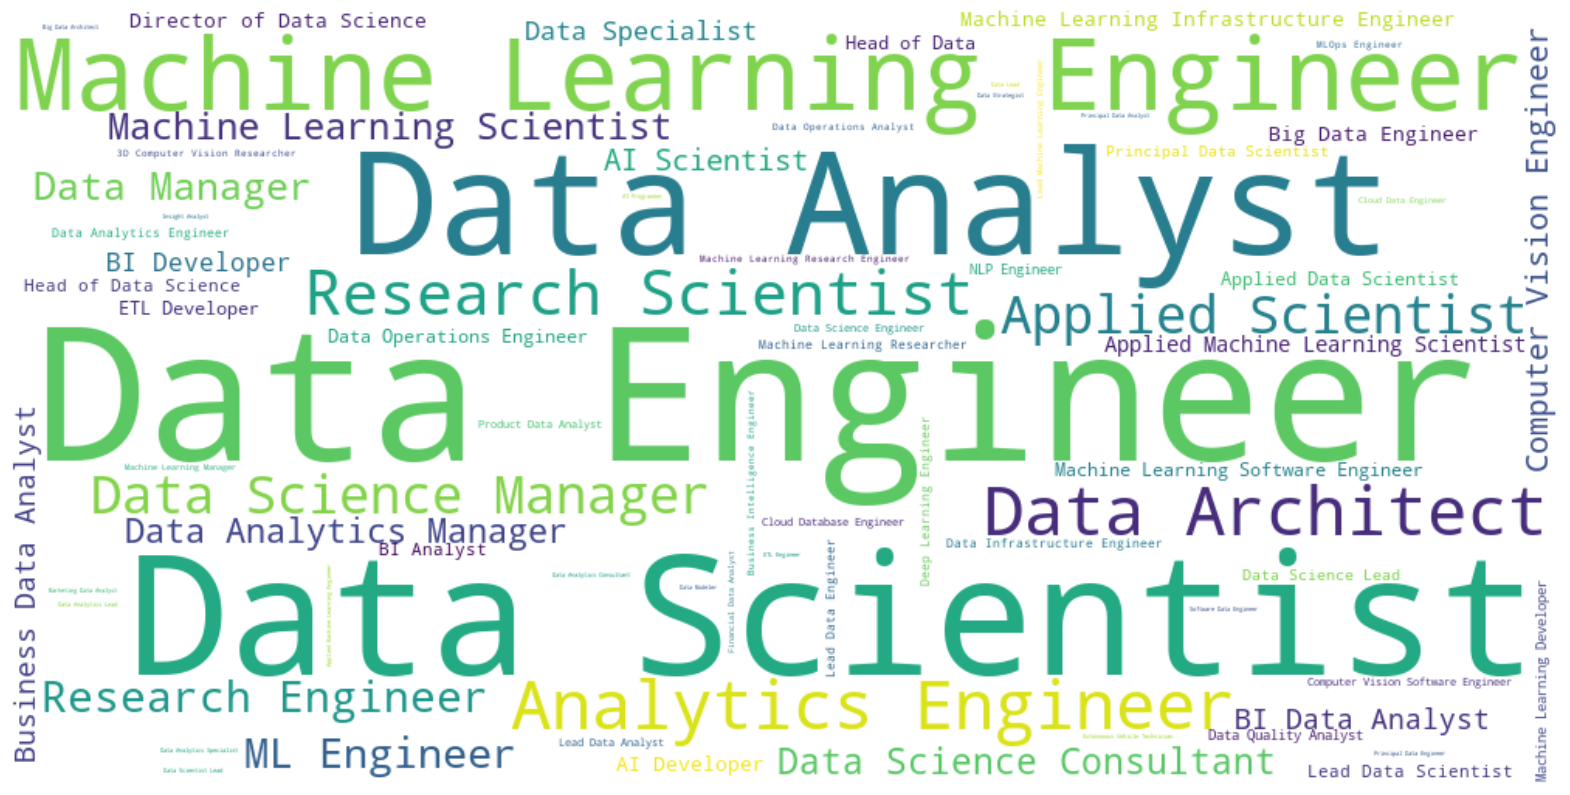

In [19]:
freq_df = Freq_df(df['job_title'].values.tolist())
data = dict(zip(freq_df['Term'].tolist(), freq_df['Frequency'].tolist()))
data = freq_df.set_index('Term').to_dict()['Frequency']

#Word_Cloud(data , 'WordCloud of job designations')

plt.figure(figsize = (20,15))
cloud = WordCloud(width = 1000, height = 500,background_color = 'white')
cloud.generate_from_frequencies(data)
    
plt.imshow(cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## Quantitative Features

In [20]:
##work year
group = df['work_year'].value_counts()

year=['2023', '2022', '2021', '2020']

fig = px.bar(x = year, y = group.values,text = group.values, 
       title = 'Work Year' , color = group.index )

fig.update_layout(xaxis_title = "Work Year", yaxis_title = "Count")
fig.update_xaxes(categoryorder='array', categoryarray= ['2020', '2021', '2022', '2023'])
fig.show()

In [21]:
##Salary distribution (in USD)
salary = df['salary_in_usd']
fig = px.histogram(salary, x="salary_in_usd", nbins = 50, title = 'Salary Distribution')
fig.update_layout(xaxis_title = "Salary (USD)", yaxis_title = "Count")
fig.show()

## Analysis between two different variables
### Salary distribution between years

In [22]:
#salary comparision between 2022 & 2023

year_2022 = df[df["work_year"].isin([2022,2022])]
salary_2022 = year_2022["salary_in_usd"]

year_2023 = df[df["work_year"].isin([2023,2023])]
salary_2023 = year_2023["salary_in_usd"] 



histogram_data =pd.DataFrame(dict(
    series=np.concatenate((["2022"]*len(salary_2022), ["2023"]*len(salary_2023))), 
    data  =np.concatenate((salary_2022,salary_2023))
))

px.histogram(histogram_data, x="data", color="series", barmode="overlay", title = "Comparison of Salary between 2022 and 2023", labels = {'data':'Salary (USD)', 'count':'Count', 'series': 'Year'}, nbins = 50)

### Comparison of job category based on years

In [23]:
#df_group = px.df.tips()
year_2020 = df[df["work_year"].isin([2020,2020])]
year_2021 = df[df["work_year"].isin([2021,2021])]

job_2020 = year_2020['job_category'].value_counts()
job_2021 = year_2021['job_category'].value_counts()
job_2022 = year_2022['job_category'].value_counts()
job_2023 = year_2023['job_category'].value_counts()

x= ['Data Engineering', 'Data Science', 'Machine Learning', 'Data Architecture', 'Management', 'Other']

plot = go.Figure(data=[go.Bar(
    name = '2020',
    x = x,
    y = job_2020.values
   ),
                       go.Bar(
    name = '2021',
    x = x,
    y = job_2021.values
   ),
                       go.Bar(
    name = '2022',
    x = x,
    y = job_2022.values
   ),
                       go.Bar(
    name = '2023',
    x = x,
    y = job_2023.values
   )
])

plot.show()


### Salary Distribution Between Each Different Employment Type

In [24]:
##salary distribution between each different employment type
fig = px.box(x = df['employment_type'], y = df['salary_in_usd'], title = 'Salary Distribution based on Employment Type', 
             labels = {'x': 'Employment Type', 'y': 'Salary (USD)'}, color = df['employment_type'], boxmode="overlay")
fig.show()

### Salary Distribution Between Each Different Experience Level

In [25]:
##salary distribution between each different experience level
fig = px.box(x = df['experience_level'], y = df['salary_in_usd'], title = 'Salary Distribution based on Experience Level',  
             labels = {'x': 'Experience Level', 'y': 'Salary (USD)'},color = df['experience_level'], boxmode="overlay")


fig.update_xaxes(categoryorder='array', categoryarray= ['Entry-level', 'Mid-level', 'Senior-level', 'Executive-level'])
fig.show()

### Salary Distribution based on Job Titles

In [26]:
##salary distribution based on job titles
fig = px.box(x = df['job_category'], y = df['salary_in_usd'],title = 'Salary Distribution based on Job Category',  
             labels = {'x': 'Job Titles', 'y': 'Salary (USD)'}, color =  df['job_category'], boxmode="overlay")
fig.show()

### Salary Distribution based on Company Size

In [27]:
##salary distribution based on size of company
fig = px.box(x = df['company_size'], y = df['salary_in_usd'],title = 'Salary Distribution based on Company Size',  
             labels = {'x': 'Company Size', 'y': 'Salary (USD)'}, color = df['company_size'], boxmode="overlay")
fig.update_xaxes(categoryorder='array', categoryarray= ['Small', 'Medium', 'Large'] )
fig.show()

### Salary Distribution based on Remote Ratio

In [28]:
fig = px.box(x = df['remote_ratio'], y = df['salary_in_usd'], title = 'Salary Distribution based on Remote Level',  
             labels = {'x': 'Remote Level', 'y': 'Salary (USD)'},color = df['remote_ratio'], boxmode="overlay" )

fig.show()

### Salary Distribution based on Company Location and Experience Level

In [29]:
emp_salary = df[['experience_level','salary_in_usd']]

#'SE': 'Senior-level', 'EN': 'Entry-level', 'EX': 'Executive-level', 'MI': 'Mid-level'})

salary_loc = df.groupby(['salary_in_usd', 'company_location']).size().reset_index()
salary_mean = salary_loc.groupby('company_location').mean().reset_index()
fig = px.choropleth(locations = salary_mean['company_location'], color = salary_mean['salary_in_usd'],
                    title = 'Average Salary Distribution based on Company Location', 
                    labels={'color': 'Average Salary', 'locations': 'Country'})
fig.show()


### Average salary of each country

In [30]:
#salary_mean_sorted = salary_mean.sort_values(ascending=False)

salary_loc = df.groupby(['salary_in_usd', 'company_location']).size().reset_index()
salary_mean = salary_loc.groupby('company_location').mean().reset_index().sort_values(by=['salary_in_usd'], ascending=False)

fig = px.bar(x = salary_mean['company_location'], 
             y = salary_mean['salary_in_usd'],
       title = 'Average Salary of Each Country', labels ={'x': 'Country', 'y': 'Average Salary'})

fig.update_layout(xaxis_title = "Country", yaxis_title = "Average")
fig.show()

In [31]:
salary_loc = df.groupby(['salary_in_usd', 'company_location']).size().reset_index()
salary_mean = salary_loc.groupby('company_location').mean().reset_index()

fig = px.treemap(salary_mean, path = [salary_mean['company_location']], values = salary_mean['salary_in_usd'],
                labels = {"labels": "Country", "salary_in_usd": "Average Salary (USD)"})
fig.update_traces(textinfo = 'label + value')
fig.show()

## Analysis between three different variables
### Salary distribution based on Experience Level and Company Size

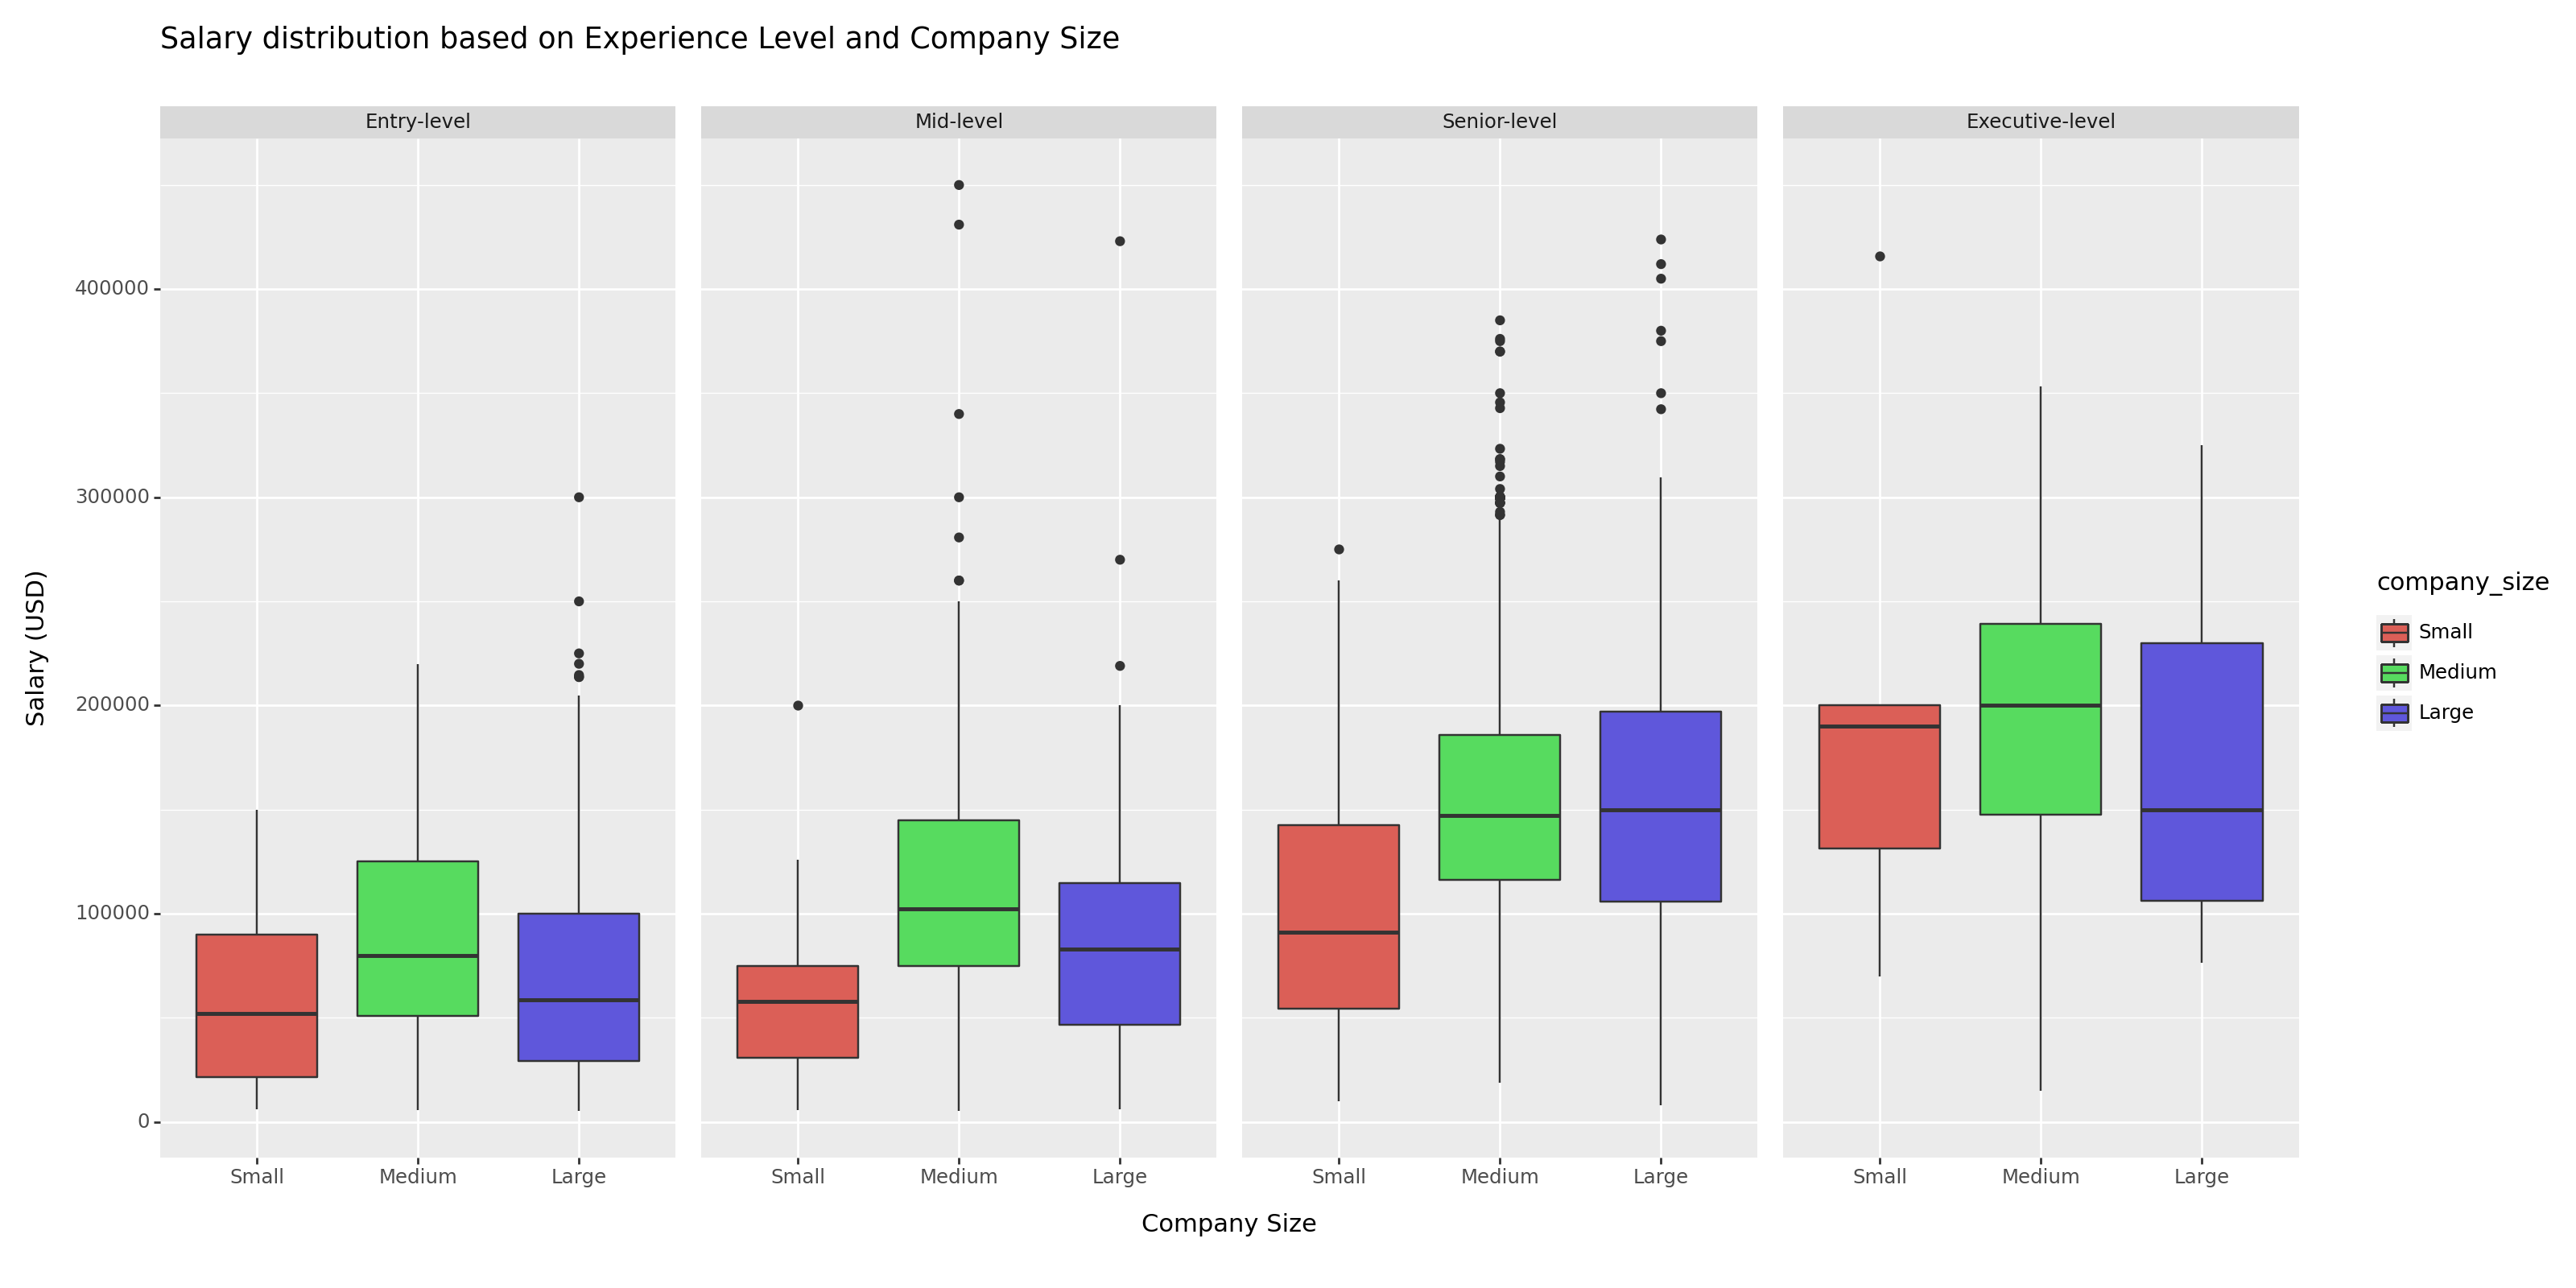

<Figure Size: (1600 x 800)>

In [32]:
#facets -subsets of data
#aesthetics 
df['experience_level']=df['experience_level'].astype('category')
df['company_size']=df['company_size'].astype('category')

df['experience_level'] = df['experience_level'].cat.reorder_categories(['Entry-level', 'Mid-level','Senior-level','Executive-level'])
df['company_size'] = df['company_size'].cat.reorder_categories(['Small', 'Medium','Large'])

(ggplot(df)
 + facet_grid(facets = "~experience_level")
 + aes(x = "company_size", y ='salary_in_usd', fill = "company_size")
 + geom_boxplot()
 + theme(figure_size=(16, 8))
 + xlab("Company Size")
 + ylab("Salary (USD)")
 + ggtitle("Salary distribution based on Experience Level and Company Size")
)

### Salary distribution based on Experience Level and Job Category

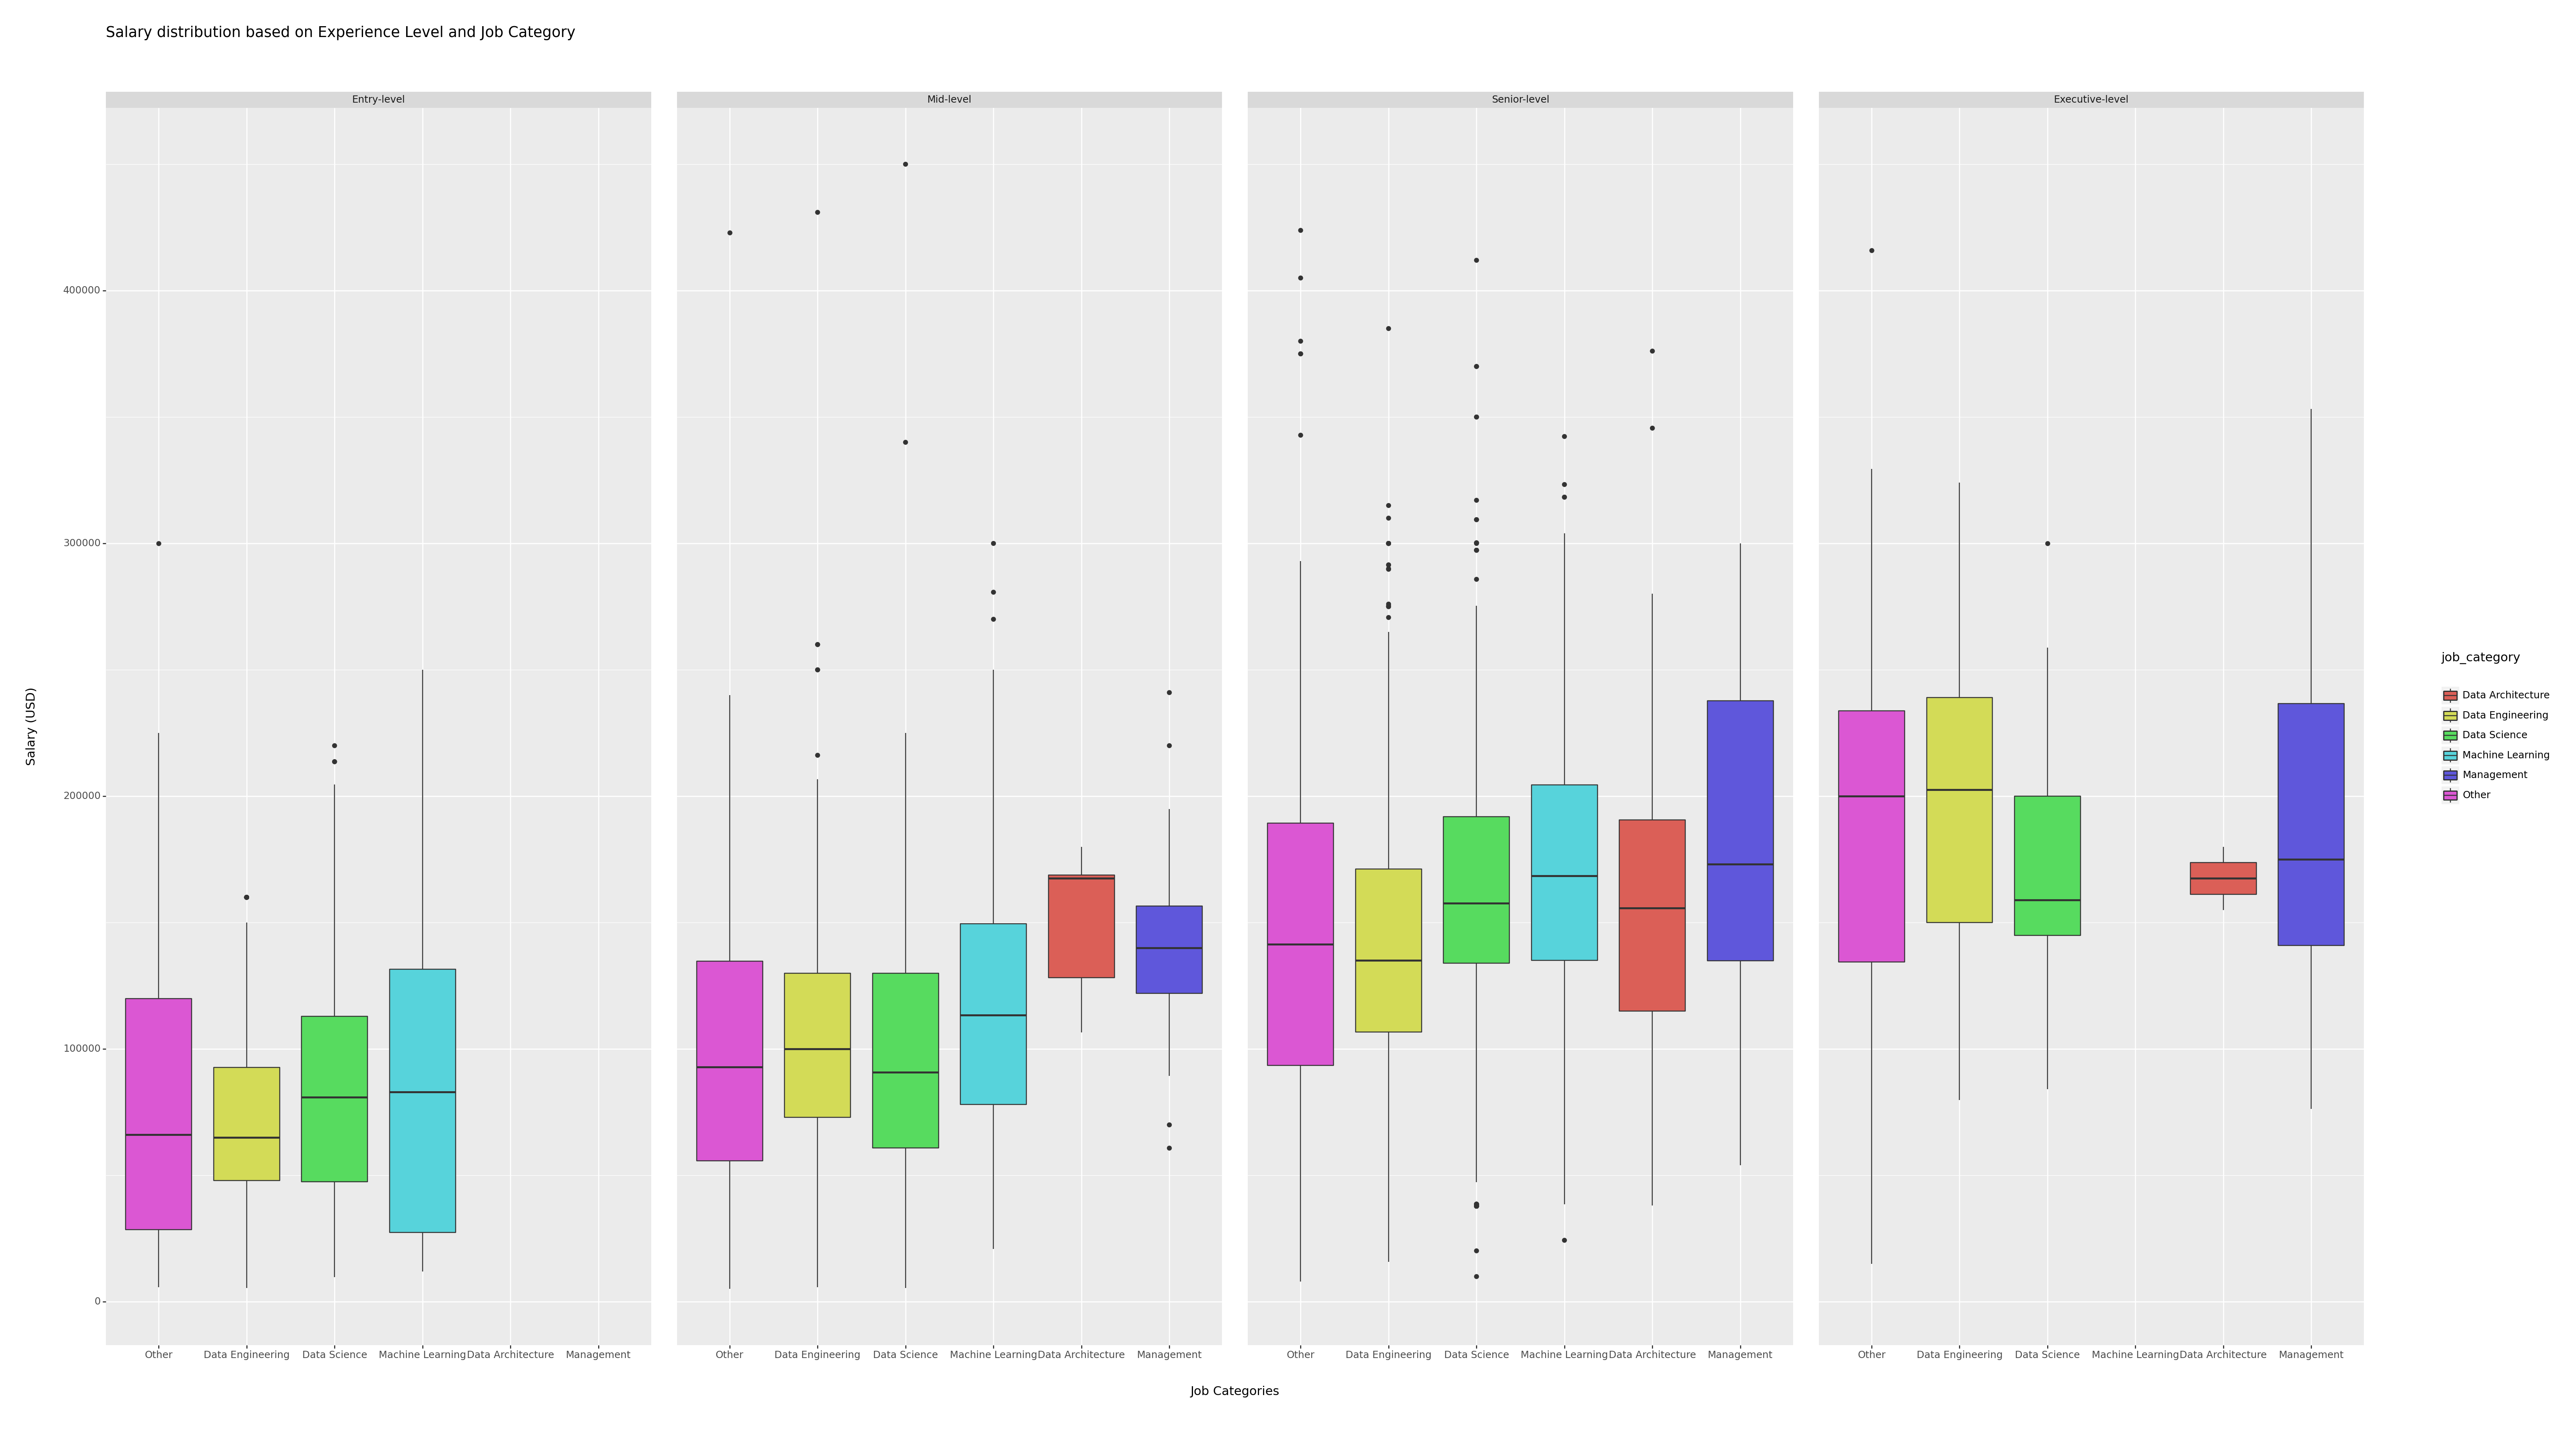

<Figure Size: (3200 x 1800)>

In [33]:
#facets -subsets of data

(ggplot(df)
 + facet_grid(facets = "~experience_level")
 + aes(x = "reorder(job_category, salary_in_usd)", y ='salary_in_usd', fill = "job_category")
 + geom_boxplot()
 + theme(figure_size=(32,18))
 + xlab("Job Categories")
 + ylab("Salary (USD)")
 + ggtitle("Salary distribution based on Experience Level and Job Category")
)